# Medical Appointment No Shows Dataset – Data Cleaning & Missing Value Handling

This notebook focuses on cleaning the Medical Appointment No Shows dataset by identifying and handling missing values and improving overall data quality.

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the Dataset

In [2]:
df = pd.read_csv("KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No


## Dataset Structure and Data Types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32342 entries, 0 to 32341
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       32342 non-null  float64
 1   AppointmentID   32342 non-null  int64  
 2   Gender          32342 non-null  object 
 3   ScheduledDay    32342 non-null  object 
 4   AppointmentDay  32341 non-null  object 
 5   Age             32341 non-null  float64
 6   Neighbourhood   32341 non-null  object 
 7   Scholarship     32341 non-null  float64
 8   Hipertension    32341 non-null  float64
 9   Diabetes        32341 non-null  float64
 10  Alcoholism      32341 non-null  float64
 11  Handcap         32341 non-null  float64
 12  SMS_received    32341 non-null  float64
 13  No-show         32341 non-null  object 
dtypes: float64(8), int64(1), object(5)
memory usage: 3.5+ MB


## Identifying Missing Values

In [4]:
df.isnull().sum()

,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,1
Age,1
Neighbourhood,1
Scholarship,1
Hipertension,1
Diabetes,1


## Visualizing Missing Data

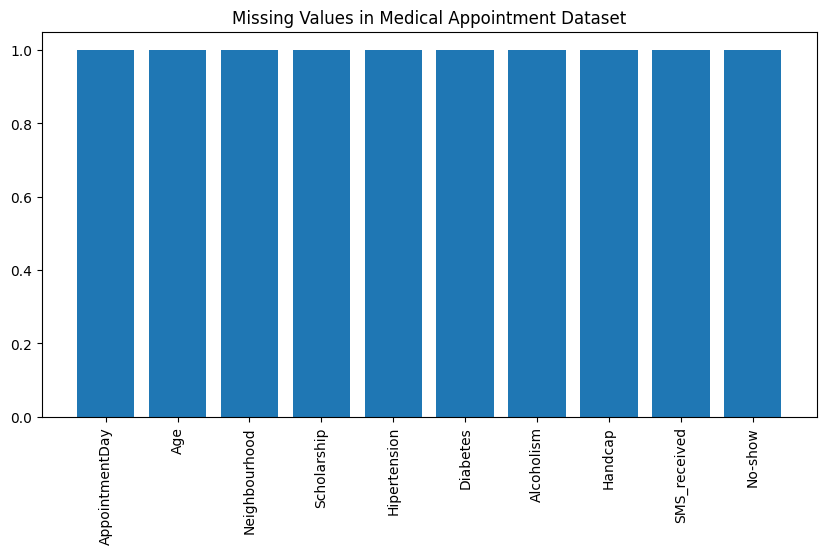

In [5]:
missing = df.isnull().sum()
missing = missing[missing > 0]

plt.figure(figsize=(10,5))
plt.bar(missing.index, missing.values)
plt.xticks(rotation=90)
plt.title("Missing Values in Medical Appointment Dataset")
plt.show()

## Handling Invalid Age Values

In [6]:
df = df[df['Age'] >= 0]

## Handling Missing Values in Numerical Columns

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

## Handling Missing Values in Categorical Columns

In [7]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

## Validating Dataset After Cleaning

In [8]:
df.isnull().sum()

,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


## Saving Cleaned Dataset

In [9]:
df.to_csv("cleaned_medical_appointments.csv", index=False)

## Conclusion

The Medical Appointment No Shows dataset was successfully cleaned by handling missing values, removing invalid records, and validating data quality. The cleaned dataset is now suitable for further analysis and machine learning tasks.